# Calculating and saving parameters

In [56]:
# Calculating currents in each ring on fft way for border structure, but with fixed number of rings
import numpy as np
from Fast_Method import solvesystem
from Geometry import Rectangle_packing
from Impedance_matrix import M_grad
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0, Params
Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
import json

Inductance = {}
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
Omega =  np.linspace(omega_0*0.9, omega_0*1.1, 1000)
H_0z = 1
mu_0 = 4 * np.pi * 1e-7
# Calculate polarisation for different structures

Dz, Dy, Dx = Params['Dz'], Params['Dy'], Params['Dx']
# Initial position of the first ring for each orientation
R0 = {
    'z': {'nz': 0, 'ny': Dy/2, 'nx': Dx/2},
    'y': {'nz': Dz/2, 'ny': 0, 'nx': Dx/2},
    'x': {'nz': Dz/2, 'ny': Dy/2, 'nx': 0}
}
#Total number of rings for each orientation
N = 20*20*20

for NZ in range(1, 21):
#for n_other in range(1, 11):
    n_other = int(round(np.sqrt(N//NZ)))
 #   NZ = N// (n_other**2)
    shape = {
        'z': {'nz': NZ, 'ny': n_other, 'nx': n_other},
    }
    Params['N'] = shape
    # make 3d structure
    print(f'\n Make rings: {Params["N"]}')
    Rings_4d ={}
    for pos in Params['N']:
        Rings_4d[pos] = Rectangle_packing(Params, r0 = R0[pos], orientation=pos).reshape(
                                                     Params['N'][pos]['nz'],
                                                     Params['N'][pos]['ny'],
                                                     Params['N'][pos]['nx'])
    Params['Number'] = int(np.sum([Rings_4d[pos].size for pos in Params['N']]))
    print([Rings_4d[pos].size for pos in Params['N']], Params['Number'])
    phi_0z = np.zeros(Params['Number'])
    Number_z = Params['N']['z']['nz'] * Params['N']['z']['ny'] * Params['N']['z']['nx']
    phi_0z[:Number_z] = H_0z * mu_0*np.pi * Radius ** 2
    #print(Rings_4d)
    #print(phi_0z/H_0z/mu_0/np.pi/Radius**2)
    print(f'Frequency modeling: {round(Omega[0]/2/np.pi/1e6, 1)}-{round(Omega[-1]/2/np.pi/1e6, 2)} MHz')
    Currents = solvesystem(Rings_4d, M_grad(Params), Omega, phi_0z=phi_0z, Inductance = Inductance, tol = 1e-3)

    Nz, Ny, Nx = Params['N']['z']['nz'], Params['N']['z']['ny'], Params['N']['z']['nx']
    Volume =  (Nx-1) * (Ny-1) * (Nz-1) * Dz * Dy * Dx
    P_0z = np.pi * Radius ** 2 /H_0z/Dz/Dy/Dx
    Currents['Params'] = Params
    Currents['RealZPolarisation'] = [P_0z/Number_z * sum(i[:Number_z]) for i in Currents['RealCurrents']]
    Currents['ImagZPolarisation'] = [P_0z/Number_z * sum(i[:Number_z]) for i in Currents['ImagCurrents']]

    dims = ''.join([pos for pos in Params['N']])
    with open(f"Data/Form_Data/anizotropic/Evolving/BorderCurrents-{dims}-{Nz}x{Ny}x{Nx}", "w") as f:
        json.dump(Currents, f)

    exclude = ['RealCurrents', 'ImagCurrents']
    data = {key: value for key, value in Currents.items() if key not in exclude}
    with open(f"Data/Form_Data/anizotropic/Evolving/BorderData-{dims}-{Nz}x{Ny}x{Nx}", "w") as f:
        json.dump(data, f)




 Make rings: {'z': {'nz': 1, 'ny': 89, 'nx': 89}}
[7921] 7921
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:03<00:00,  3.71s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [00:55<00:00, 17.94it/s]


FFT solving: Done, shape = [('z', (1, 89, 89))]

 Make rings: {'z': {'nz': 2, 'ny': 63, 'nx': 63}}
[7938] 7938
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [00:50<00:00, 19.63it/s] 


FFT solving: Done, shape = [('z', (2, 63, 63))]

 Make rings: {'z': {'nz': 3, 'ny': 52, 'nx': 52}}
[8112] 8112
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [01:34<00:00, 10.58it/s]


FFT solving: Done, shape = [('z', (3, 52, 52))]

 Make rings: {'z': {'nz': 4, 'ny': 45, 'nx': 45}}
[8100] 8100
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [01:15<00:00, 13.22it/s]


FFT solving: Done, shape = [('z', (4, 45, 45))]

 Make rings: {'z': {'nz': 5, 'ny': 40, 'nx': 40}}
[8000] 8000
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [01:12<00:00, 13.88it/s]


FFT solving: Done, shape = [('z', (5, 40, 40))]

 Make rings: {'z': {'nz': 6, 'ny': 37, 'nx': 37}}
[8214] 8214
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [01:26<00:00, 11.63it/s]


FFT solving: Done, shape = [('z', (6, 37, 37))]

 Make rings: {'z': {'nz': 7, 'ny': 34, 'nx': 34}}
[8092] 8092
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [01:35<00:00, 10.49it/s]


FFT solving: Done, shape = [('z', (7, 34, 34))]

 Make rings: {'z': {'nz': 8, 'ny': 32, 'nx': 32}}
[8192] 8192
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [00:49<00:00, 20.40it/s]


FFT solving: Done, shape = [('z', (8, 32, 32))]

 Make rings: {'z': {'nz': 9, 'ny': 30, 'nx': 30}}
[8100] 8100
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [01:11<00:00, 13.91it/s]


FFT solving: Done, shape = [('z', (9, 30, 30))]

 Make rings: {'z': {'nz': 10, 'ny': 28, 'nx': 28}}
[7840] 7840
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [00:53<00:00, 18.84it/s] 


FFT solving: Done, shape = [('z', (10, 28, 28))]

 Make rings: {'z': {'nz': 11, 'ny': 27, 'nx': 27}}
[8019] 8019
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [01:01<00:00, 16.28it/s]


FFT solving: Done, shape = [('z', (11, 27, 27))]

 Make rings: {'z': {'nz': 12, 'ny': 26, 'nx': 26}}
[8112] 8112
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [00:51<00:00, 19.40it/s]


FFT solving: Done, shape = [('z', (12, 26, 26))]

 Make rings: {'z': {'nz': 13, 'ny': 25, 'nx': 25}}
[8125] 8125
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [00:48<00:00, 20.48it/s]


FFT solving: Done, shape = [('z', (13, 25, 25))]

 Make rings: {'z': {'nz': 14, 'ny': 24, 'nx': 24}}
[8064] 8064
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [01:24<00:00, 11.77it/s]


FFT solving: Done, shape = [('z', (14, 24, 24))]

 Make rings: {'z': {'nz': 15, 'ny': 23, 'nx': 23}}
[7935] 7935
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [00:45<00:00, 22.17it/s]


FFT solving: Done, shape = [('z', (15, 23, 23))]

 Make rings: {'z': {'nz': 16, 'ny': 22, 'nx': 22}}
[7744] 7744
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [00:50<00:00, 19.78it/s]


FFT solving: Done, shape = [('z', (16, 22, 22))]

 Make rings: {'z': {'nz': 17, 'ny': 22, 'nx': 22}}
[8228] 8228
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [01:00<00:00, 16.44it/s]


FFT solving: Done, shape = [('z', (17, 22, 22))]

 Make rings: {'z': {'nz': 18, 'ny': 21, 'nx': 21}}
[7938] 7938
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [01:38<00:00, 10.18it/s]


FFT solving: Done, shape = [('z', (18, 21, 21))]

 Make rings: {'z': {'nz': 19, 'ny': 21, 'nx': 21}}
[8379] 8379
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [01:31<00:00, 10.91it/s]


FFT solving: Done, shape = [('z', (19, 21, 21))]

 Make rings: {'z': {'nz': 20, 'ny': 20, 'nx': 20}}
[8000] 8000
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [00:46<00:00, 21.32it/s]


FFT solving: Done, shape = [('z', (20, 20, 20))]


In [20]:
# Calculating currents in each ring on fft way for border structure, but with fixed number of rings
import numpy as np
from Fast_Method import solvesystem
from Geometry import Rectangle_packing
from Impedance_matrix import M_grad
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0, Params
Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
import json

Inductance = {}
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
Omega =  np.linspace(omega_0*0.9, omega_0*1.1, 1000)
H_0z = 1
mu_0 = 4 * np.pi * 1e-7
# Calculate polarisation for different structures

Dz, Dy, Dx = Params['Dz'], Params['Dy'], Params['Dx']
# Initial position of the first ring for each orientation
R0 = {
    'z': {'nz': 0, 'ny': Dy/2, 'nx': Dx/2},
    'y': {'nz': Dz/2, 'ny': 0, 'nx': Dx/2},
    'x': {'nz': Dz/2, 'ny': Dy/2, 'nx': 0}
}
#Total number of rings for each orientation
N = 21*20*20 * 3

#for NZ in range(1, 2):
for n_other in range(18, 19):
#    n_other = int(round((NZ + np.sqrt(NZ**2 + N*(3*NZ+1)))/(3*NZ+1)))
    NZ = (N - n_other**2) // (3*n_other**2  + 2*n_other)
    shape = {
        'z': {'nz': NZ+1, 'ny': n_other, 'nx': n_other},
        'y': {'nz': NZ, 'ny': n_other+1, 'nx': n_other},
        'x': {'nz': NZ, 'ny': n_other, 'nx': n_other+1}
    }
    shape = {'z': {'nz': 2, 'ny': 80, 'nx': 80}, 
                'y': {'nz': 1, 'ny': 81, 'nx': 80},
                'x': {'nz': 1, 'ny': 80, 'nx': 81}}
    Params['N'] = shape
    # make 3d structure
    print(f'\n Make rings: {Params["N"]}')
    Rings_4d ={}
    for pos in Params['N']:
        Rings_4d[pos] = Rectangle_packing(Params, r0 = R0[pos], orientation=pos).reshape(
                                                     Params['N'][pos]['nz'],
                                                     Params['N'][pos]['ny'],
                                                     Params['N'][pos]['nx'])
    Params['Number'] = int(np.sum([Rings_4d[pos].size for pos in Params['N']]))
    print([Rings_4d[pos].size for pos in Params['N']], Params['Number'])
    phi_0z = np.zeros(Params['Number'])
    Number_z = Params['N']['z']['nz'] * Params['N']['z']['ny'] * Params['N']['z']['nx']
    phi_0z[:Number_z] = H_0z * mu_0*np.pi * Radius ** 2
    #print(Rings_4d)
    #print(phi_0z/H_0z/mu_0/np.pi/Radius**2)
    print(f'Frequency modeling: {round(Omega[0]/2/np.pi/1e6, 1)}-{round(Omega[-1]/2/np.pi/1e6, 2)} MHz')
    Currents = solvesystem(Rings_4d, M_grad(Params), Omega, phi_0z=phi_0z, Inductance = Inductance, tol = 1e-3)

    Nz, Ny, Nx = [Params['N'][pos][f'n{pos}']-1 for pos in Params['N']]
    Volume =  (Nx-1) * (Ny-1) * (Nz-1) * Dz * Dy * Dx
    P_0z = np.pi * Radius ** 2 /H_0z/Dz/Dy/Dx
    Currents['Params'] = Params
    Currents['RealZPolarisation'] = [P_0z/Number_z * sum(i[:Number_z]) for i in Currents['RealCurrents']]
    Currents['ImagZPolarisation'] = [P_0z/Number_z * sum(i[:Number_z]) for i in Currents['ImagCurrents']]

    dims = ''.join([pos for pos in Params['N']])
    with open(f"Data/Form_Data/izotropic/Evolving/BorderCurrents-{dims}-{Nz}x{Ny}x{Nx}", "w") as f:
        json.dump(Currents, f)

    exclude = ['RealCurrents', 'ImagCurrents']
    data = {key: value for key, value in Currents.items() if key not in exclude}
    with open(f"Data/Form_Data/izotropic/Evolving/BorderData-{dims}-{Nz}x{Ny}x{Nx}", "w") as f:
        json.dump(data, f)



 Make rings: {'z': {'nz': 5, 'ny': 44, 'nx': 44}, 'y': {'nz': 4, 'ny': 45, 'nx': 44}, 'x': {'nz': 4, 'ny': 44, 'nx': 45}}
[9680, 7920, 7920] 25520
Frequency modeling: 5.7-6.96 MHz
Cirvecs forming


100%|██████████| 3/3 [00:40<00:00, 13.36s/it]


Circvecs: Done
FFT solving


100%|██████████| 1000/1000 [1:19:02<00:00,  4.74s/it] 


FFT solving: Done, shape = [('z', (5, 44, 44)), ('y', (4, 45, 44)), ('x', (4, 44, 45))]


# Plotting graphs for chi

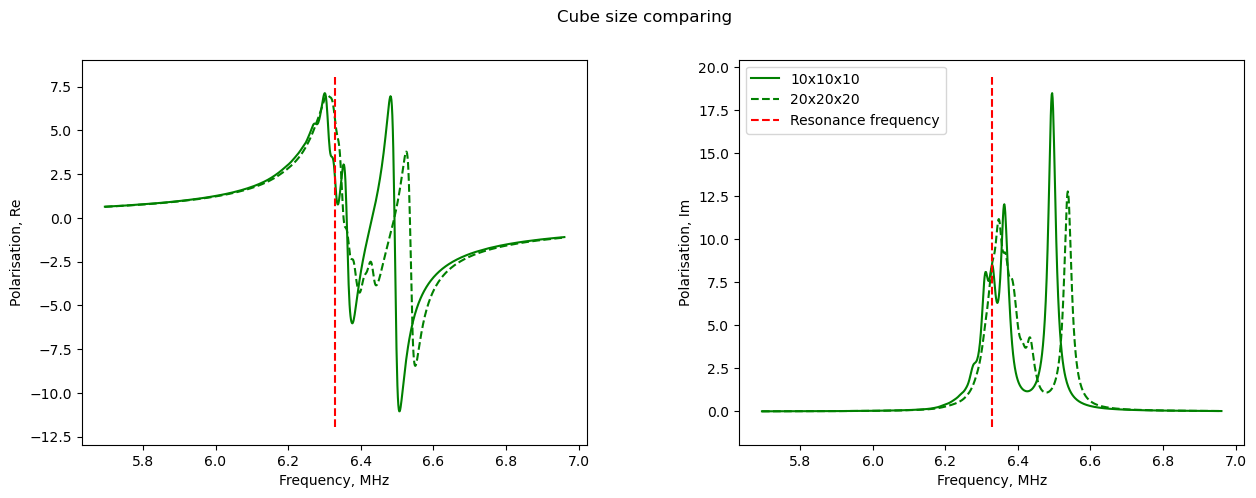

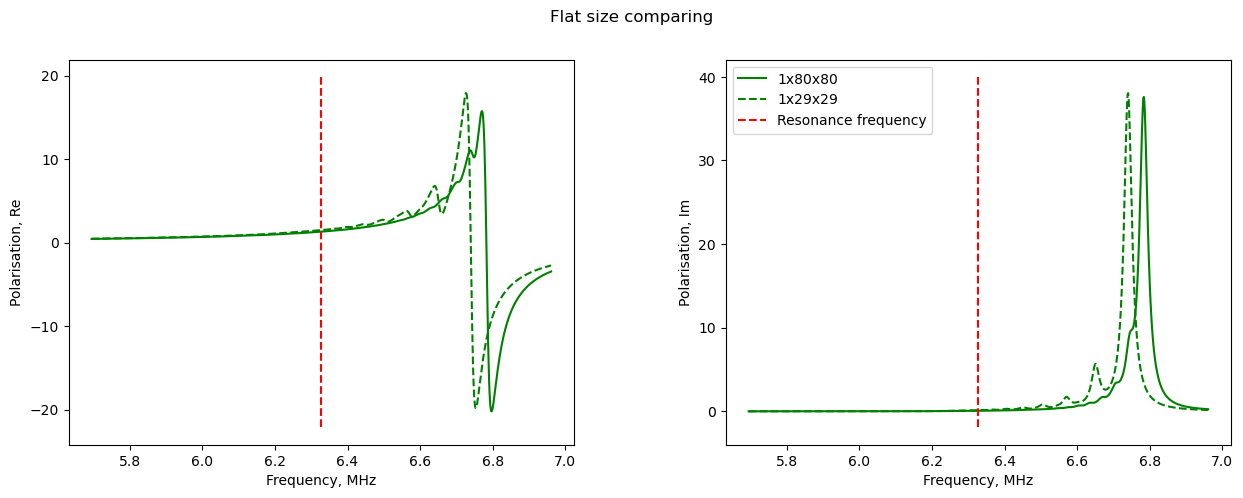

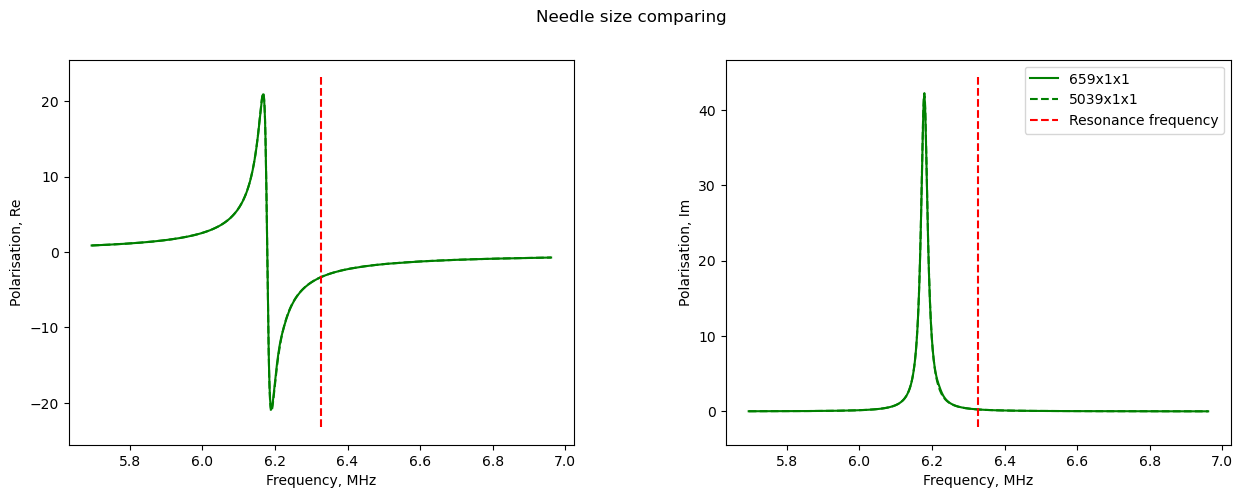

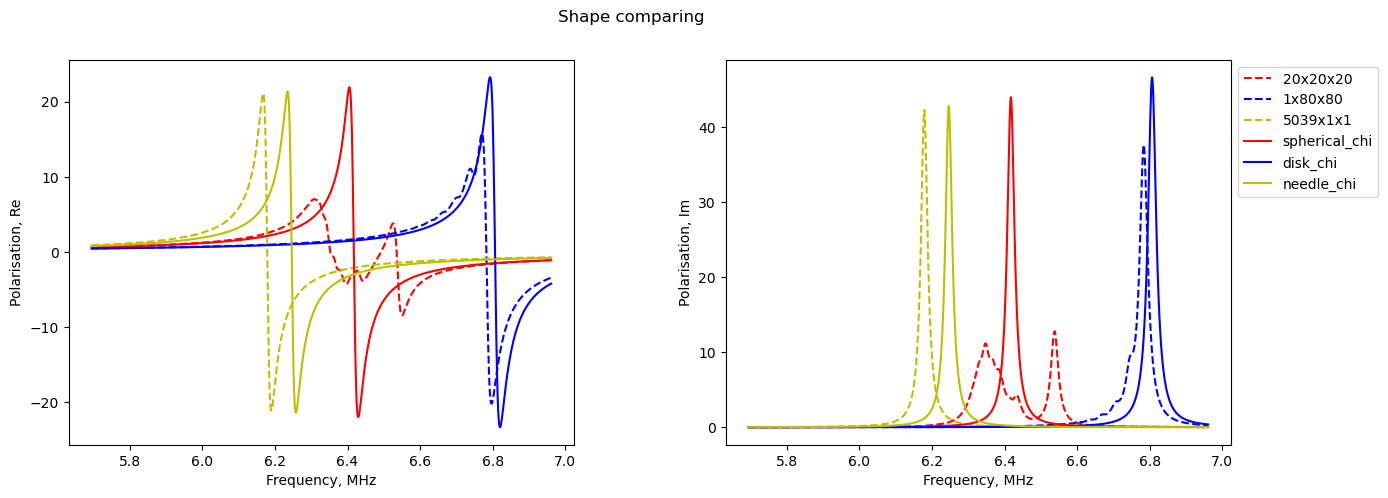

In [19]:
# Compare exact structures
import json
import numpy as np
import matplotlib.pyplot as plt
from Verifying_MRI.Parameters_MRI import Params
from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])


# Compare big, average and small cube structures

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)   
for n, linestyle in zip([1, 2], ['-', '--']):
    shape = f'{n * 10 }x{n * 10 }x{n * 10}'
    Nz, Ny, Nx = n*10+1, n*10+1, n*10+1
    Volume =  (Nx-1) * (Ny-1) * (Nz-1)
    Number = Nx * (Ny-1) * (Nz-1) + (Nx-1) * Ny * (Nz-1) + (Nx-1) * (Ny-1) * Nz
    alpha = Volume/Number
    with open(f"Data/Form_Data/izotropic/Evolving/BorderData-zyx-{shape}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealZPolarisation"]) 
    ImagPolarisation = np.array(Data["ImagZPolarisation"]) 
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{shape}', linestyle = linestyle, color = 'g')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{shape}', linestyle = linestyle, color = 'g')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

plt.suptitle('Cube size comparing')
plt.subplot(121)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.subplot(122)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.legend()
plt.show()

# Compare big, average and small flat structures

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  
for n, linestyle in zip(['1x80x80', '1x29x29'], ['-', '--']):
    shape = n
    # Nz, Ny, Nx = n+1, 32*n, 32*n
    # Volume =  (Nx-1) * (Ny-1) * (Nz-1)
    # Number = Nx * (Ny-1) * (Nz-1) + (Nx-1) * Ny * (Nz-1) + (Nx-1) * (Ny-1) * Nz
    # alpha = Volume/Number
    with open(f"Data/Form_Data/izotropic/Evolving/BorderData-zyx-{shape}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealZPolarisation"]) 
    ImagPolarisation = np.array(Data["ImagZPolarisation"]) 
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{shape}', linestyle = linestyle, color = 'g')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{shape}', linestyle = linestyle, color = 'g')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

plt.suptitle('Flat size comparing')
plt.subplot(121)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.subplot(122)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.legend()
plt.show()

# Compare big, average and small needle structures

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  
for n, linestyle in zip(['659x1x1', '5039x1x1'], ['-', '--']):
    shape = n
    # Nz, Ny, Nx = n*1000+1, n+1, n+1
    # Volume =  (Nx-1) * (Ny-1) * (Nz-1)
    # Number = Nx * (Ny-1) * (Nz-1) + (Nx-1) * Ny * (Nz-1) + (Nx-1) * (Ny-1) * Nz
    # alpha = Volume/Number
    with open(f"Data/Form_Data/izotropic/Evolving/BorderData-zyx-{shape}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealZPolarisation"]) 
    ImagPolarisation = np.array(Data["ImagZPolarisation"])
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{shape}', linestyle = linestyle, color = 'g')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{shape}', linestyle = linestyle, color = 'g')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

plt.suptitle('Needle size comparing')
plt.subplot(121)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.subplot(122)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.legend()
plt.show()

# Compare disk, needle and spherical structures
plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  
for shape, color in zip(['20x20x20', '1x80x80', '5039x1x1'], ['r', 'b', 'y']):
    Nz, Ny, Nx = [int(i) for i in shape.split('x')]
    # Volume =  (Nx-1) * (Ny-1) * (Nz-1)
    # Number = Nx * (Ny-1) * (Nz-1) + (Nx-1) * Ny * (Nz-1) + (Nx-1) * (Ny-1) * Nz
    # alpha = Volume/Number
    with open(f"Data/Form_Data/izotropic/Evolving/BorderData-zyx-{shape}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealZPolarisation"]) 
    ImagPolarisation = np.array(Data["ImagZPolarisation"]) 
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{shape}', color = color, linestyle = '--')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{shape}', color = color, linestyle = '--')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

for theory, color in zip([spherical_chi, disk_chi, needle_chi], ['r', 'b', 'y']):
    MU = effective_mu(Params)(Omega)
    CHI = theory(MU)
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, CHI.real, label = theory.__name__, color = color)
    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, CHI.imag, label = theory.__name__, color = color)

plt.suptitle('Shape comparing')
plt.subplot(121)
ylim = plt.ylim()
#plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.subplot(122)
ylim = plt.ylim()
#plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
# Theory plotting
for theory in [spherical_chi, disk_chi, needle_chi]:
    MU = effective_mu(Params)(Omega)
    CHI = theory(MU)
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, CHI.real, label = theory.__name__)
    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, CHI.imag, label = theory.__name__)

plt.subplot(121)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.subplot(122)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



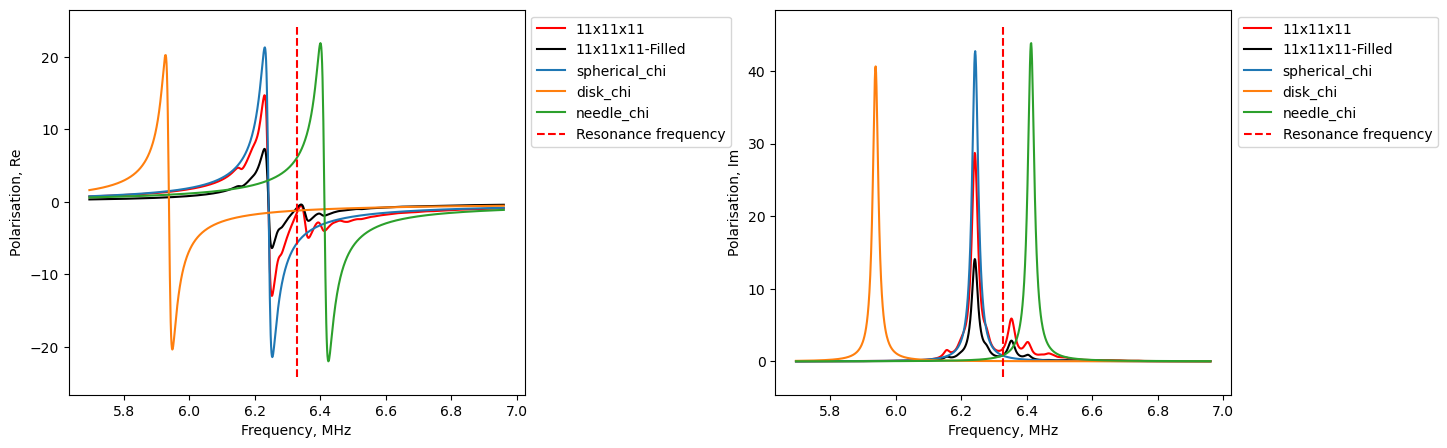

In [4]:
# Compare sphere with and without filling


import json
import numpy as np
import matplotlib.pyplot as plt
from Verifying_MRI.Parameters_MRI import Params
from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])


# Compare big, average and small cube structures

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.55, hspace=0.55)   
for n, linestyle in zip([1], ['-']):
    shape = f'{n * 10 + 1}x{n * 10 + 1}x{n * 10 + 1}'
    Nz, Ny, Nx = n*10+1, n*10+1, n*10+1
    Volume =  (Nx-1) * (Ny-1) * (Nz-1)
    Number = Nx * (Ny-1) * (Nz-1) + (Nx-1) * Ny * (Nz-1) + (Nx-1) * (Ny-1) * Nz
    alpha = Volume/Number
    with open(f"Data/Form_Data/izotropic/Sphere/S-NotFilled-Data-zyx-{shape}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = -np.array(Data["RealZPolarisation"])
    ImagPolarisation = -np.array(Data["ImagZPolarisation"])
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{shape}', linestyle = linestyle, color = 'r')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{shape}', linestyle = linestyle, color = 'r')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

# Compare big, average and small cube structures

for n, linestyle in zip([1], ['-']):
    shape = f'{n * 10 + 1}x{n * 10 + 1}x{n * 10 + 1}'
    Nz, Ny, Nx = n*10+1, n*10+1, n*10+1
    Volume =  (Nx-1) * (Ny-1) * (Nz-1)
    Number = Nx * (Ny-1) * (Nz-1) + (Nx-1) * Ny * (Nz-1) + (Nx-1) * (Ny-1) * Nz
    alpha = Volume/Number
    with open(f"Data/Form_Data/izotropic/Sphere/S-Filled-Data-zyx-{shape}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = -np.array(Data["RealZPolarisation"])
    ImagPolarisation = -np.array(Data["ImagZPolarisation"])
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{shape}-Filled', linestyle = linestyle, color = 'black')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{shape}-Filled', linestyle = linestyle, color = 'black')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")


for theory in [spherical_chi, disk_chi, needle_chi]:
    MU = effective_mu(Params)(Omega)
    CHI = -theory(MU)
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, CHI.real, label = theory.__name__)
    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, CHI.imag, label = theory.__name__)

plt.subplot(121)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.subplot(122)
ylim = plt.ylim()
plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Drawing GIFs for parameters evolution

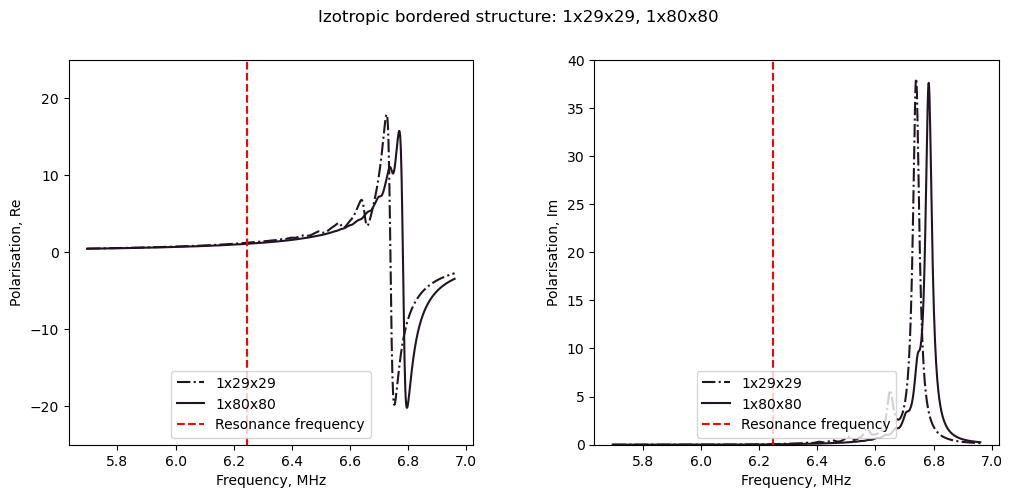

In [57]:
# Compare evolution of polarisability for real and imaginary parts.
import matplotlib.pyplot as plt
import numpy as np
import json
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0 as Omega_0, Params
import json
import matplotlib.animation as anime

Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = Omega_0/10
mu_0 = 4 * np.pi * 10**-7

N_big = 21*20*20 * 3
N_small = 11*10*10 * 3

shapes = []
for Nz_big in range(1, 19):
    Nz_small = int(np.ceil(Nz_big/2))
    
    n_other_big = int(round((Nz_big + np.sqrt(Nz_big**2 + N_big*(3*Nz_big+1)))/(3*Nz_big+1)))
    n_other_small = int(round((Nz_small + np.sqrt(Nz_small**2 + N_small*(3*Nz_small+1)))/(3*Nz_small+1)))

    shapes.append((f'{Nz_big}x{n_other_big}x{n_other_big}', f'{Nz_small}x{n_other_small}x{n_other_small}') )

shapes.append((f'19x21x21', '10x10x10'))
shapes.append((f'20x20x20', '10x10x10'))

for n_other_big in range(19, 0, -1):
    n_other_small = int(np.ceil(n_other_big/2))
    
    Nz_big = (N_big - n_other_big**2) // (3*n_other_big**2  + 2*n_other_big)
    Nz_small = (N_small - n_other_small**2) // (3*n_other_small**2  + 2*n_other_small)
    shapes.append((f'{Nz_big}x{n_other_big}x{n_other_big}', f'{Nz_small}x{n_other_small}x{n_other_small}') )

fig, ax = plt.subplots()
# Numbers of plots in x and y axes

def plot_GIF(shape):
    # Clearing figure and set figsize
    plt.clf()
    fig.set_size_inches(12, 5)

    # Set title and space between plots
    Nz_big, Ny_big, Nx_big = [int(i) for i in shape[0].split('x')]
    Nz_small, Ny_small, Nx_small = [int(i) for i in shape[1].split('x')]

    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"Izotropic bordered structure: {Nz_small}x{Ny_small}x{Nx_small}, {Nz_big}x{Ny_big}x{Nx_big}")
    color = f'#22{hex((min(Nz_small+1, Ny_small+1)) * 10)[2:]}22'


    with open(f"Data/Form_Data/izotropic/Evolving/BorderData-zyx-{Nz_small}x{Ny_small}x{Nx_small}", "r") as f:
        Data = json.load(f)

    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealZPolarisation"])
    ImagPolarisation = np.array(Data["ImagZPolarisation"])

    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{Nz_small}x{Ny_small}x{Nx_small}', color = color, linestyle = '-.')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{Nz_small}x{Ny_small}x{Nx_small}', color = color, linestyle = '-.')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

    with open(f"Data/Form_Data/izotropic/Evolving/BorderData-zyx-{Nz_big}x{Ny_big}x{Nx_big}", "r") as f:
        Data = json.load(f)

    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealZPolarisation"])
    ImagPolarisation = np.array(Data["ImagZPolarisation"])
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{Nz_big}x{Ny_big}x{Nx_big}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{Nz_big}x{Ny_big}x{Nx_big}', color = color)
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

    plt.subplot(121)
    plt.ylim(-25, 25)
    plt.axvline(omega_0/2/np.pi/10**6, color="red", linestyle="--", label='Resonance frequency')
    plt.legend(loc = 'lower center')
    plt.subplot(122)
    plt.ylim(0, 40)
    plt.axvline(omega_0/2/np.pi/10**6, color="red", linestyle="--", label='Resonance frequency')
    plt.legend(loc = 'lower center')

        
# Make and save animation object
ani = anime.FuncAnimation(fig, plot_GIF,
                          frames = shapes,
                          interval = 50
                          )

ani.save(f'BorderReIm-Evolution.gif', writer='pillow', fps=10, dpi=100)

In [38]:
# Draw polarisation for substructures for extreme cases
import matplotlib.pyplot as plt
import numpy as np
import json
from Verifying_MRI.Parameters_MRI import Dz, Dy, Dx, Radius, omega_0, Params
import json
from PIL import Image

Params['R'] = 0.01
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])
mu_0 = 4 * np.pi * 10**-7
dims = 'z'
H_0z = 1
# Define fucntions for calculating polarisation for substructures
def Chi(I_w, shape, slice_deep, pos):
    start = 0
    for Type in shape:
        if Type != pos:
            start += np.prod([shape[Type][j] for j in shape[Type]])
        else:
            break
    end = start + np.prod([shape[pos][j] for j in shape[pos]])
    I_3d = np.array(I_w[:, start:end]).reshape([I_w.shape[0]] + [shape[pos][j] for j in shape[pos]])

    P_0z = np.pi * Radius ** 2 /Dz/Dy/Dx/H_0z
    # find start and end of substructure avoiding empty or 1 element substructures
    nz, ny, nx = [shape[pos][j] for j in shape[pos]]
    nz_min, ny_min, nx_min = 2 - (nz-(pos =='z'))%2 + (pos == 'z'), 2 - (ny-(pos =='y'))%2 + (pos == 'y'), 2 - (nx-(pos =='x'))%2 + (pos == 'x')

    start_nz = min((nz - nz_min)//2, slice_deep)
    start_ny = min((ny - ny_min)//2, slice_deep)
    start_nx = min((nx - nx_min)//2, slice_deep)

    end_nz = max(nz - (nz - nz_min)//2, nz - slice_deep)
    end_ny = max(ny - (ny - ny_min)//2, ny - slice_deep)
    end_nx = max(nx - (nx - nx_min)//2, nx - slice_deep)
    number = (end_nz - start_nz) * (end_ny - start_ny) * (end_nx - start_nx)
    nz, ny, nx = end_nz - start_nz, end_ny - start_ny, end_nx - start_nx
    return np.sum(I_3d[:, start_nz:end_nz, start_ny:end_ny, start_nx:end_nx], axis = (1, 2, 3))* P_0z/number, nz, ny, nx

images = []

Nz, Ny, Nx = 659, 1, 1
max_slice = max(Nz, Ny, Nx)//2
# # Calculate polarisation for substructures

dims = 'zyx'
Polarisations_fft = {}
NZ_fft, NY_fft, NX_fft = {}, {}, {}
slice_or = 'z'
with open(f"Data/Form_Data/izotropic/Evolving/BorderCurrents-{dims}-{Nz}x{Ny}x{Nx}", "r") as f:
    Data = json.load(f)
    Currents_fft = np.array(Data["RealCurrents"]) + 1j * np.array(Data["ImagCurrents"])
    shape_fft = Data['Params']['N']
    
    Omega_fft = np.array(Data["Omega"])

    for slice_deep in range(0, max_slice):
        polarisation, Nz, Ny, Nx = Chi(Currents_fft, shape_fft, slice_deep, slice_or)
        NZ_fft[slice_deep], NY_fft[slice_deep], NX_fft[slice_deep] = Nz, Ny+1, Nx+1
        Polarisations_fft[slice_deep] = polarisation


    central_pos = 'z'
    cental_z, central_y, cenral_x = 659//2, 0, 0
    start = 0
    for Type in shape_fft:
        if Type != central_pos:
            start += np.prod([shape_fft[Type][j] for j in shape_fft[Type]])
        else:
            break
    end = start + np.prod([shape_fft[central_pos][j] for j in shape_fft[central_pos]])

    central_polarisation_fft =  np.pi * Radius ** 2 /Dz/Dy/Dx/H_0z * Currents_fft[:, start:end].reshape((len(Omega_fft), shape_fft['z']['nz'], shape_fft['z']['ny'], shape_fft['z']['nx']))[:, cental_z, central_y, cenral_x]

# Polarisations_straight = {}
# NZ_straight, NY_straight, NX_straight = {}, {}, {}
# Nz, Ny, Nx = 10, 10, 10
# slice_or = 'z'
# with open (f'Data/Form_Data/izotropic/Cube/S-Currents-{dims}-{Nz}x{Ny}x{Nx}', 'r') as f:
#     Data = json.load(f)
#     Currents_straight = np.array(Data["RealCurrents"]) + 1j * np.array(Data["ImagCurrents"])
#     Omega_straight = np.array(Data["Omega"])
#     shape_straight = {
#         'z': {'nz': 11, 'ny':10, 'nx': 10},
#         'y': {'nz': 10, 'ny': 11, 'nx': 10},
#         'x': {'nz': 10, 'ny': 10, 'nx': 11}
#         }

#     for slice_deep in range(0, (max(Nz, Ny, Nx))//2):
#         polarisation, Nz, Ny, Nx = Chi(Currents_straight, shape_straight, slice_deep, slice_or)

#         NZ_straight[slice_deep], NY_straight[slice_deep], NX_straight[slice_deep] = Nz, Ny+1, Nx+1
#         Polarisations_straight[slice_deep] = polarisation

#     central_pos = 'z'
#     cental_z, central_y, cenral_x = 5, 5, 5
#     end_z = 1100

#     central_polarisation_straight = P_0z = np.pi * Radius ** 2 /Dz/Dy/Dx/H_0z * Currents_straight[:, :end_z].reshape((1000, 11, 10, 10))[:, cental_z, central_y, cenral_x]


    

        
    
       


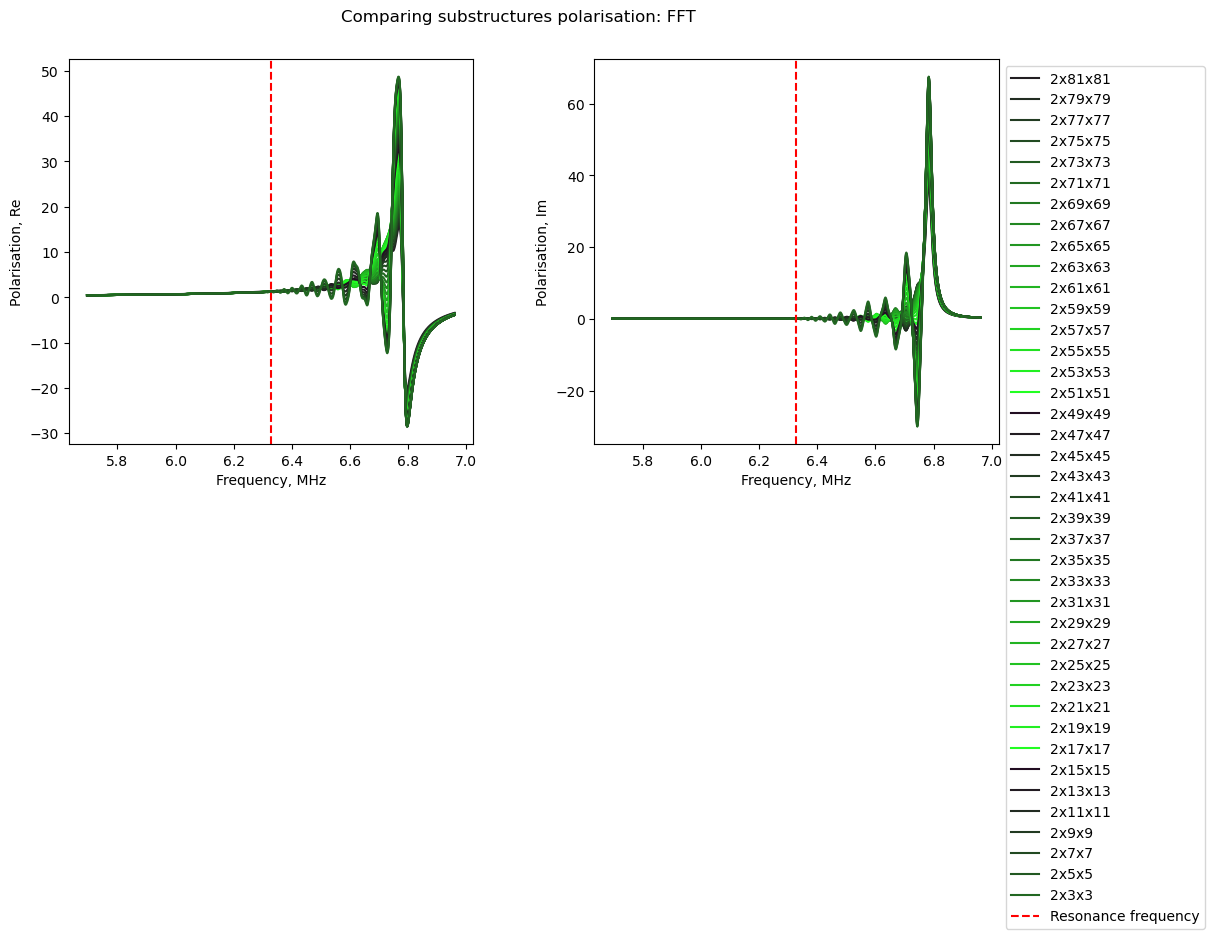

In [63]:

plt.figure(figsize=(12, 5))

plt.suptitle(f"Comparing substructures polarisation: FFT")
for slice_deep in range(0, 40):
    polarisation_fft = Polarisations_fft[slice_deep]
    #polarisation_straight = Polarisations_straight[slice_deep]
    Nz_fft, Ny_fft, Nx_fft = NZ_fft[slice_deep], NY_fft[slice_deep], NX_fft[slice_deep]
    #Nz_straight, Ny_straight, Nx_straight = NZ_straight[slice_deep], NY_straight[slice_deep], NX_straight[slice_deep]

    plt.subplot(121)

    #plt.plot(Omega_straight/2/np.pi/10**6, np.real(polarisation_straight), label = f'{Nz_straight}x{Ny_straight}x{Nx_straight}', color = f'#22{hex((slice_deep+1) * 20)[-2:]}22')
    plt.plot(Omega_fft/2/np.pi/10**6, np.real(polarisation_fft), label = f'{Nz_fft}x{Ny_fft}x{Nx_fft}', color = f'#22{hex((slice_deep+2) * 15)[-2:]}22')
    
    plt.subplot(122)

    #plt.plot(Omega_straight/2/np.pi/10**6, np.imag(polarisation_straight), label = f'{Nz_straight}x{Ny_straight}x{Nx_straight}', color = f'#22{hex((slice_deep+1) * 20)[-2:]}22')
    plt.plot(Omega_fft/2/np.pi/10**6, np.imag(polarisation_fft), label = f'{Nz_fft}x{Ny_fft}x{Nx_fft}', color = f'#22{hex((slice_deep+2) * 15)[-2:]}22')

plt.subplot(121)
plt.xlabel("Frequency, MHz")
plt.ylabel("Polarisation, Re")
plt.axvline(omega_0/2/np.pi/10**6, color="red", linestyle="--", label='Resonance frequency')
plt.subplot(122)
plt.xlabel("Frequency, MHz")
plt.ylabel("Polarisation, Im")
plt.axvline(omega_0/2/np.pi/10**6, color="red", linestyle="--", label='Resonance frequency')
plt.legend(bbox_to_anchor=(1, 1))
plt.subplots_adjust(wspace=0.3, hspace=0.0) 
plt.show()



6.246530910011538


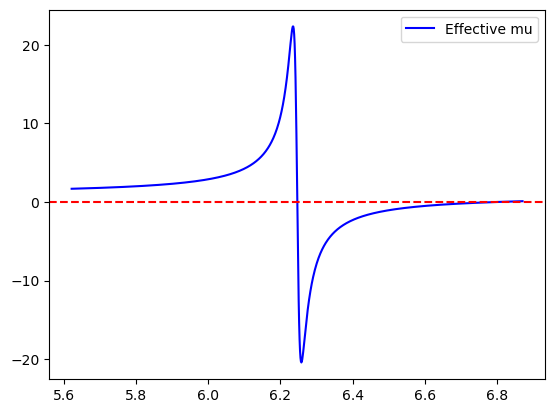

In [14]:
from Straight_Method import effective_mu
from Verifying_MRI.Parameters_MRI import omega_0 as omega_r, Params
import numpy as np
import matplotlib.pyplot as plt
Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = omega_r/10

# L = 13.459 * 10 ** -9                   # Self-inductance
# C = 470 * 10 ** -12                     # Capacitance
# R = 0.0465/10                              # Resistance

# Params['R'] = R
# Params['L'] = L
# Params['C'] = C
#omega_0 = 1/np.sqrt(Params['L'] * Params['C'])

Omega_fft = np.linspace(0.9 * omega_0, 1.1*omega_0, 1000)
mu_0 = 4 * np.pi * 10 ** (-7)
r = Params['Radius']
R = Params['R']
C = Params['C']
L = Params['L']
a = Params['Dz']
sigma = -0.06
k_1 = mu_0 * r * sigma
k_2 = mu_0 * np.pi ** 2 * r ** 4 /(a ** 3)
def effective_mu(Params, frequency = False):
    mu_0 = 4 * np.pi * 10 ** (-7)
    r = Params['Radius']
    R = Params['R']
    C = Params['C']
    L = Params['L']
    a = Params['Dz']
    sigma = -0.06

    Z = lambda Omega : R + 1j * Omega * L + 1/(1j * Omega * C) + 1j * Omega * mu_0 * r * sigma
    Const =  lambda Omega: - 1j * Omega * mu_0 * np.pi ** 2 * r ** 4 /(a ** 3)
    if frequency:
        return lambda w: (Z(w) + 2/3 * Const(w))/(Z(w) - 1/3 * Const(w)) 
    return lambda w: (Z(w) + 2/3 * Const(w))/(Z(w) - 1/3 * Const(w))

dw = 0.000001 * omega_0
omega_start = 0.9 * omega_0
while np.real(effective_mu(Params)(omega_start)) > 0:
    omega_start += dw
print(omega_start/np.pi/2e6)
#plt.plot(Omega_fft/np.pi/1e6/2, np.imag(effective_mu(Params)(Omega_fft)), label = 'Effective mu', color = 'blue')
plt.plot(Omega_fft/np.pi/1e6/2, np.real(effective_mu(Params)(Omega_fft)), label = 'Effective mu', color = 'blue')
#plt.plot(Omega_fft/np.pi/1e6/2, np.imag(1/z(Omega_fft)), label = 'Imag z')

a = L ** 2 + k_1 ** 2 - 2/9 * k_2 ** 2
b = R ** 2
c = 1/(C ** 2)
D  = b ** 2 - 4 * a * c

plt.legend()
plt.axhline(0, color = 'red', linestyle = '--')


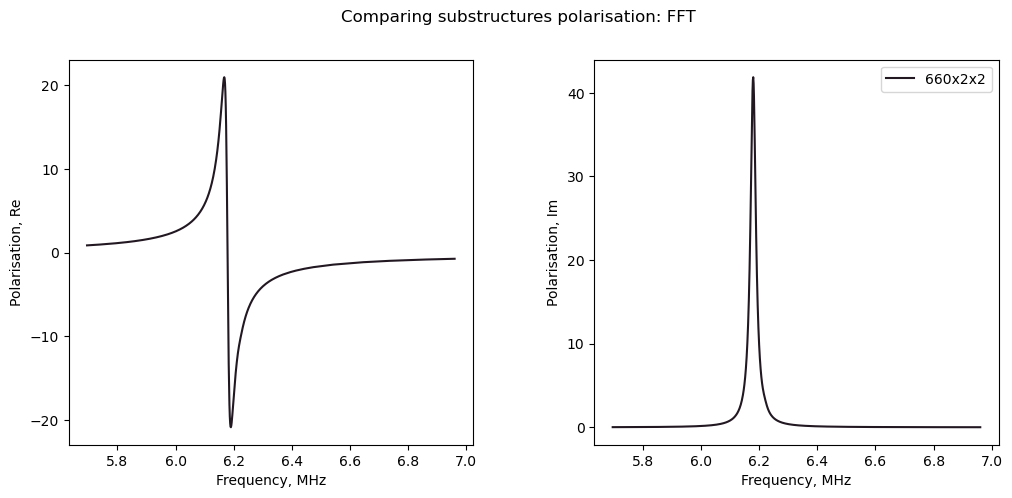

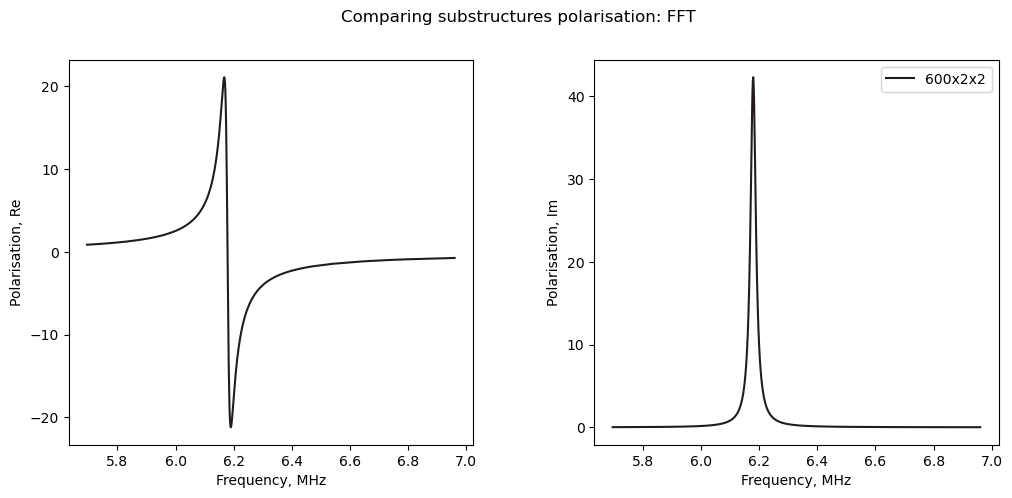

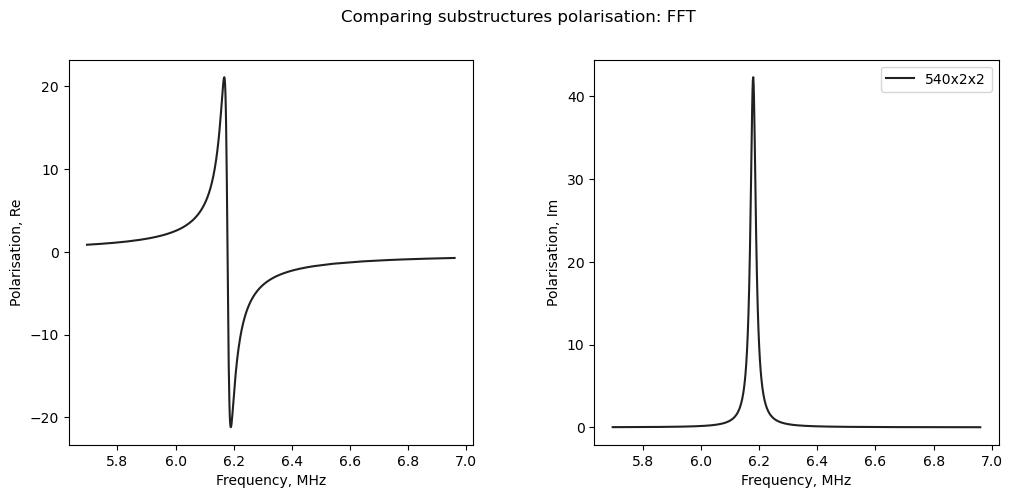

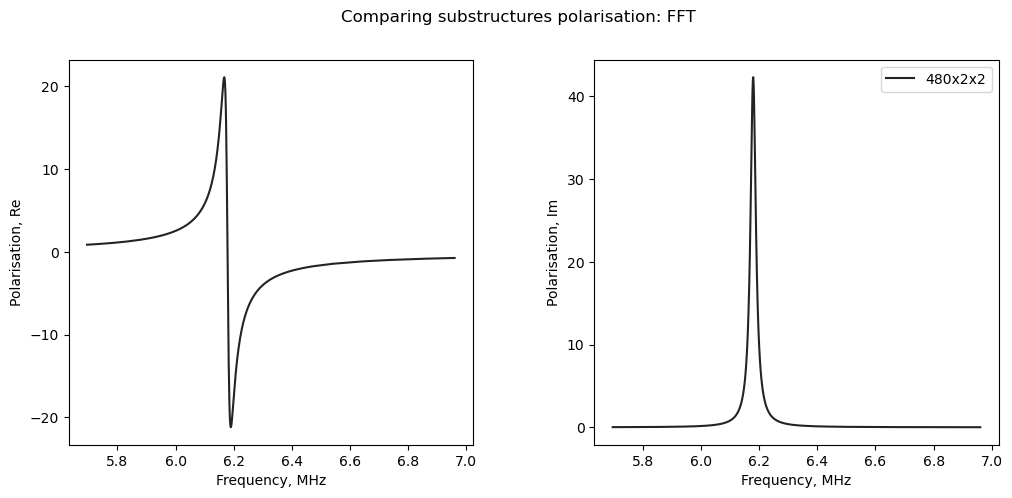

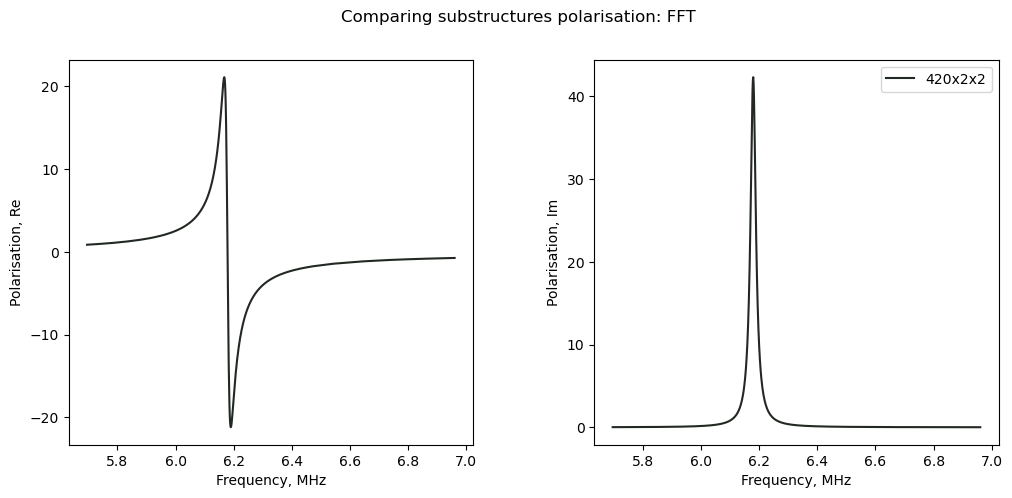

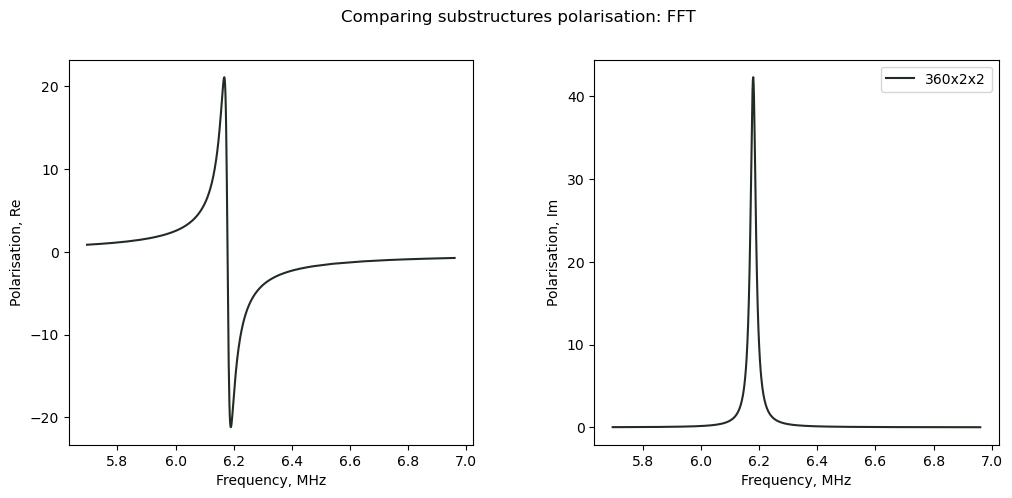

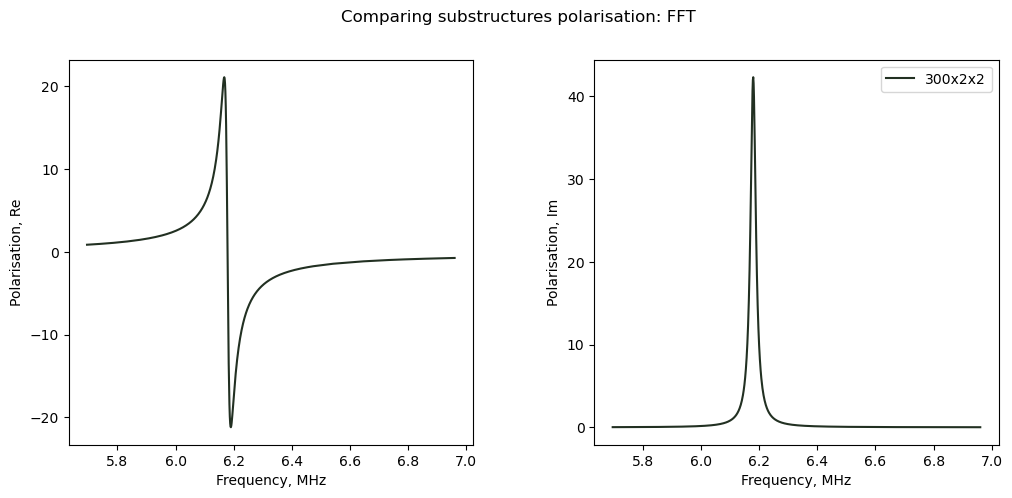

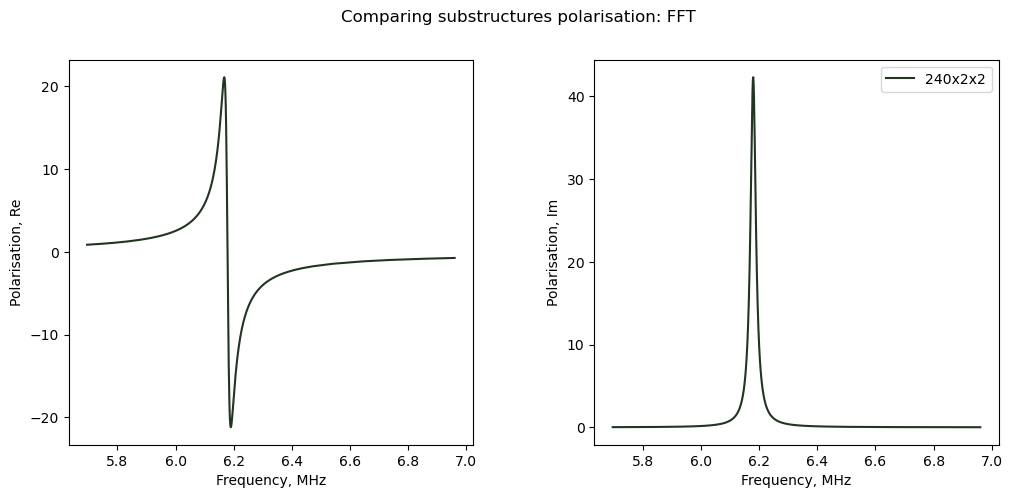

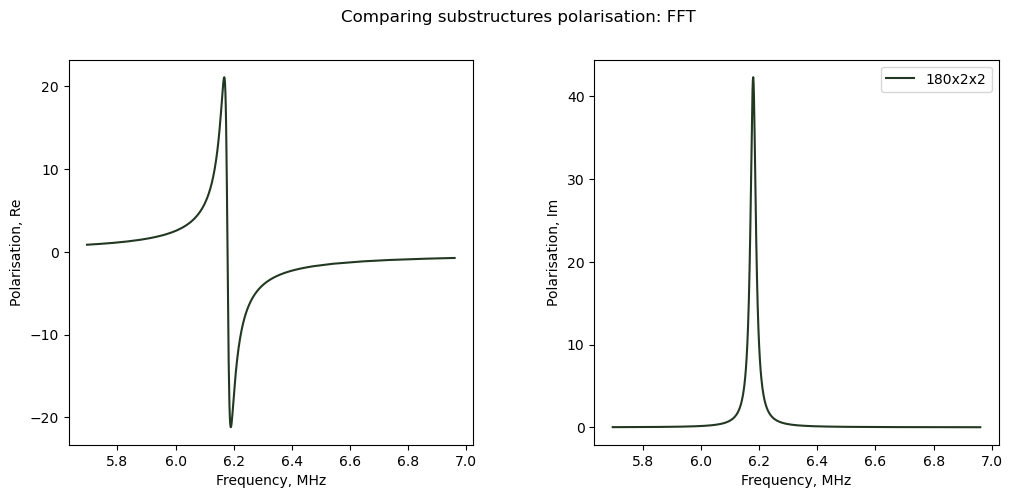

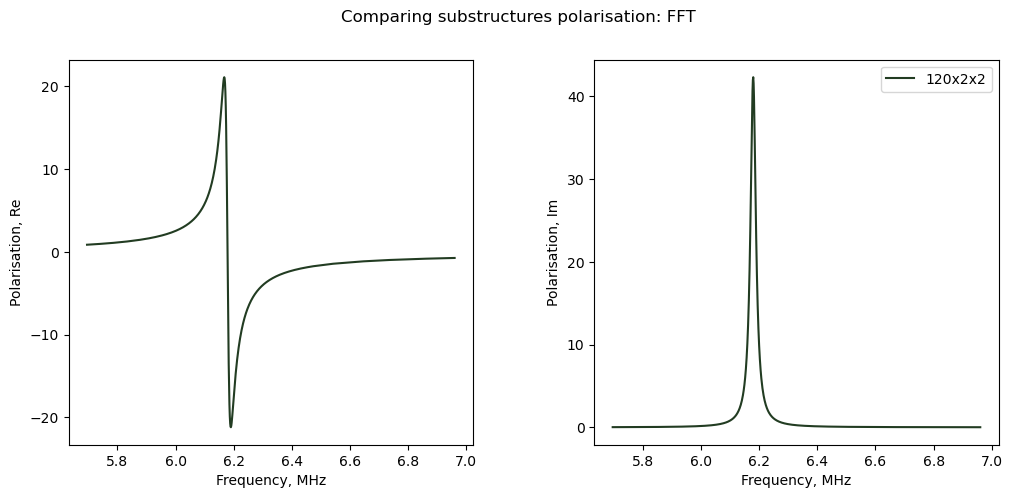

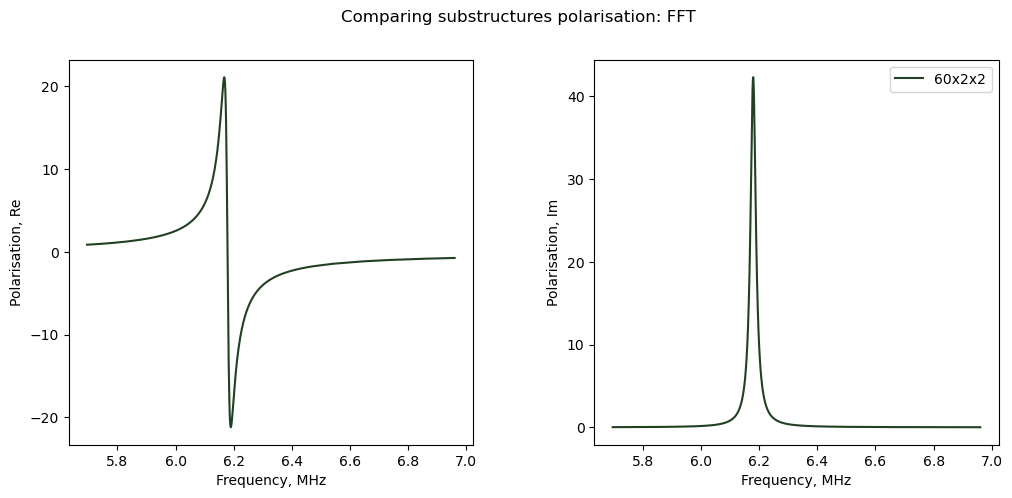

In [39]:
from Verifying_MRI.Parameters_MRI import omega_0
omega_0 = omega_0/10
images = []

for slice_deep in range(0, max_slice, 30):
    plt.figure(figsize=(12, 5))
    plt.suptitle(f"Comparing substructures polarisation: FFT")
    polarisation_fft = Polarisations_fft[slice_deep]
    #polarisation_straight = Polarisations_straight[slice_deep]
    Nz_fft, Ny_fft, Nx_fft = NZ_fft[slice_deep], NY_fft[slice_deep], NX_fft[slice_deep]
    #Nz_straight, Ny_straight, Nx_straight = NZ_straight[slice_deep], NY_straight[slice_deep], NX_straight[slice_deep]

    plt.subplot(121)

    #plt.plot(Omega_fft/2/np.pi/1e6, np.real(central_polarisation_fft), label = 'border-ring', color = 'red')
    #plt.plot(Omega_straight/2/np.pi/1e6, np.real(central_polarisation_straight), label = 'central-ring-straight', color = 'red')
    #plt.plot(Omega_straight/2/np.pi/10**6, np.real(polarisation_straight), label = f'{Nz_straight}x{Ny_straight}x{Nx_straight}-straight', color = f'#22{hex((slice_deep+1) * 20)[-2:]}22')
    plt.plot(Omega_fft/2/np.pi/10**6, np.real(polarisation_fft), label = f'{Nz_fft}x{Ny_fft}x{Nx_fft}-fft', color = f'#22{hex((slice_deep//30+6) * 4)[-2:]}22')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")
    #plt.axvline(omega_0/2/np.pi/10**6, color="red", linestyle="--", label='Resonance frequency')

    plt.subplot(122)

    #plt.plot(Omega_fft/2/np.pi/10**6, np.imag(central_polarisation_fft), label = 'border-ring', color = 'red')
    #plt.plot(Omega_straight/2/np.pi/10**6, np.imag(central_polarisation_straight), label = 'central-ring-straight', color = 'red')
    #plt.plot(Omega_straight/2/np.pi/10**6, np.imag(polarisation_straight), label = f'{Nz_straight}x{Ny_straight}x{Nx_straight}', color = f'#22{hex((slice_deep+1) * 20)[-2:]}22')
    plt.plot(Omega_fft/2/np.pi/10**6, np.imag(polarisation_fft), label = f'{Nz_fft}x{Ny_fft}x{Nx_fft}', color = f'#22{hex((slice_deep//30+6) * 4)[-2:]}22')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")
    #plt.axvline(omega_0/2/np.pi/10**6, color="red", linestyle="--", label='Resonance frequency')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.subplot(122)

    plt.subplots_adjust(wspace=0.3, hspace=0.0) 

    plt.savefig(f"Plots/Form/CubeSlicingGIF.jpg")
    img = Image.open('Plots/Form/CubeSlicingGIF.jpg')
    img.show()
    images.append(img)
    

images[0].save('Plots/Form/NeedleSubstructures.gif', save_all=True,
                 append_images=images[1:],
                 duration=500,
                 loop=0)

# Anizotopic anilyse

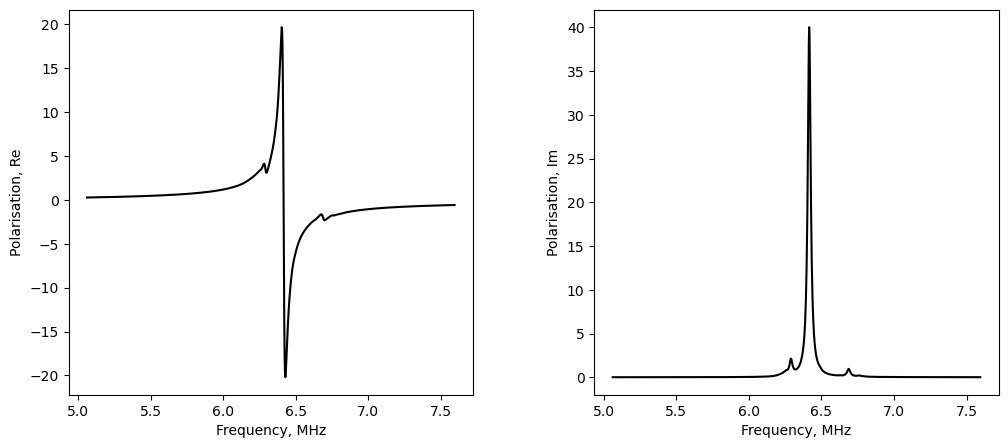

In [5]:
# Plot anizotropoc structure
import json
import numpy as np
import matplotlib.pyplot as plt
from Verifying_MRI.Parameters_MRI import Params
from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
Params['R'] = 0.002
Params['L'] = 13.459 * 10 ** -9
Params['C'] = 470 * 10 ** -12*100
omega_0 = 1/np.sqrt(Params['L'] * Params['C'])



for pos in Grad:
    plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.suptitle(f'Compare anizotropic gradient: {pos}')
    for grad in Grad[pos]:
        with open(f"Data/Grad_Data/anizotropic/Cube/Data-z-20x20x20-{max(grad)}", "r") as f:
            Data = json.load(f)
        Omega = np.array(Data["Omega"])
        RealPolarisation = np.array(Data["RealZPolarisation"]) 
        ImagPolarisation = np.array(Data["ImagZPolarisation"]) 
        plt.subplot(121)
        plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{grad}', linestyle = '-', label = max(grad))
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Re")
    
        plt.subplot(122)
        plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{grad}', linestyle = '-')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Im")

# Compare maximum gradient in each direction
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle(f'Compare anizotropic gradient: max')
for pos in Grad:
    with open(f"Data/Grad_Data/anizotropic/Cube/{pos}-grad/Data-z-20x20x20-0.3", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    RealPolarisation = np.array(Data["RealZPolarisation"]) 
    ImagPolarisation = np.array(Data["ImagZPolarisation"]) 
    plt.subplot(121)
    plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{grad}', linestyle = '-', label = max(grad))
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{grad}', linestyle = '-')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")


# Drawing Currents distribution

In [29]:
# Making GIF for polarisation for different orientations
import json
import numpy as np
import matplotlib.pyplot as plt


# Get Data for plotting
Data = {}
shapes = ['10x10x10', '58x4x4', '1x80x80']
dims = 'zyx'
for shape in shapes:    
    with open(f"Data/Form_Data/izotropic/Evolving/BorderCurrents-{dims}-{shape}", "r") as f:
        Data[shape] = json.load(f)

# Nz, Ny, Nx = 11, 11, 11
# with open (f'Data/Form_Data/izotropic/Cube/S-Currents-{dims}-{Nz}x{Ny}x{Nx}', 'r') as f:
#     Data_straight = json.load(f)

# Data = Data_fft.copy()
# Data['RealCurrents'] = abs(np.array(Data_fft['RealCurrents'])- np.array(Data_straight['RealCurrents']))/abs(np.array(Data_straight['RealCurrents']))
# Data['ImagCurrents'] = abs(np.array(Data_fft['ImagCurrents'])- np.array(Data_straight['ImagCurrents']))/abs(np.array(Data_straight['ImagCurrents']))


In [ ]:
# Calculate polarisation for slices
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as anime
from tqdm import tqdm

# Drawing GIFs

def SaveDistribution(Data, rtype, slice_deep, slice_or, name):
    Currents_4D = np.array(Data["RealCurrents"], dtype = complex) + 1j * np.array(Data["ImagCurrents"], dtype= complex)
    Omega = np.array(Data["Omega"])

    Params = Data['Params']
    Dz, Dy, Dx = Params['Dz'], Params['Dy'], Params['Dx']
    N = Params['N']
    H_0z = 1

    Radius = Params['Radius']
    start = 0
    for ring_type in N:
        if ring_type != rtype:
            start += np.prod([N[ring_type][j] for j in N[ring_type]])
        else:
            break
    end = start + np.prod([N[rtype][j] for j in N[rtype]])

    rslice = [slice(slice_deep * (slice_or =='z'), (slice_deep+1)*(slice_or=='z') + N[rtype]['nz'] * (slice_or != 'z'), 1),
      slice(slice_deep * (slice_or =='y'), (slice_deep+1)*(slice_or=='y') + N[rtype]['ny'] * (slice_or != 'y'), 1),
      slice(slice_deep * (slice_or =='x'), (slice_deep+1)*(slice_or=='x') + N[rtype]['nx'] * (slice_or != 'x'), 1)]

    Currents2D = np.real(np.squeeze(Currents_4D[:,start:end].reshape([len(Omega)]+ [N[rtype][j] for j in N[rtype]])[:, *rslice]))*np.pi * Radius ** 2 /Dz/Dy/Dx/H_0z

    # Calculate extremums for each slice
    MaxCurrents = Currents2D.max()
    MinCurrents = Currents2D.min()
    MaxDeltaCurrents = MaxCurrents - MinCurrents

    fig, ax = plt.subplots()
    
    
    n_1, n_2 = tuple([j for j in N[rtype].keys() if j != f'n{slice_or}'])
        
    X, Y = list(range(N[rtype][n_1])), list(range(N[rtype][n_2]))

    def plot_GIF(i):
        plt.clf()

        fig.set_size_inches((12, 10))
        ax.set_aspect(len(Y)/len(X))

        Currents = Currents2D[i]
        omega = Omega[i]
        
        Lines = plt.contour(X, Y, Currents.T, 6, colors = 'black')

        Imax, Imin = Currents.max(), Currents.min()
        DeltaCurrents = np.real(Imax) - np.real(Imin)

        amplitude = DeltaCurrents/MaxDeltaCurrents
        middlepos = (Imin-MinCurrents)/(MaxDeltaCurrents - DeltaCurrents)
        ticksnumber = round(amplitude * 10) + 1
        ticks = list(map(lambda x: round(np.real(x), 2), np.linspace(Imax, Imin, ticksnumber)))

        plt.xlabel(n_1, fontsize = 15)
        plt.ylabel(n_2, fontsize = 15)

        plt.contourf(X, Y, Currents.T, 100, cmap=plt.cm.hot)
        plt.clabel(Lines, inline=1, fontsize=15)
        plt.colorbar(label = r'$\chi$', fraction = 0.03, pad = 0.05, 
                          shrink = 10, aspect = amplitude/0.03, anchor = (0, middlepos),
                          ticks = ticks)
        plt.title(f"{slice_or} slice on {slice_deep} layer for {rtype}-ring: $f =${round(omega/2/np.pi/10 ** 6, 3)}, MHz", fontsize = 15)

    ani = anime.FuncAnimation(fig, plot_GIF,
                              frames = 1,#tqdm(list(range(len(Omega)))),
                              interval = 50
                              )

    ani.save(f'{name}.gif', writer='imagemagick', fps=24)

for rtype in ('z', 'y', 'x'):
    for slice_or in ('z', 'y', 'x'):
            for slice_deep in (0, 4, 9):
                SaveDistribution(Data_fft, rtype, slice_deep, slice_or, f'Plots/Current_distribution/Form/Cube-11x11x11-{rtype}ring-{slice_or}slice-{slice_deep}-fft')
                SaveDistribution(Data_straight, rtype, slice_deep, slice_or, f'Plots/Form/Slicing-Cube-11x11x11-{rtype}-ring-{slice_or}slice-{slice_deep}-straight')

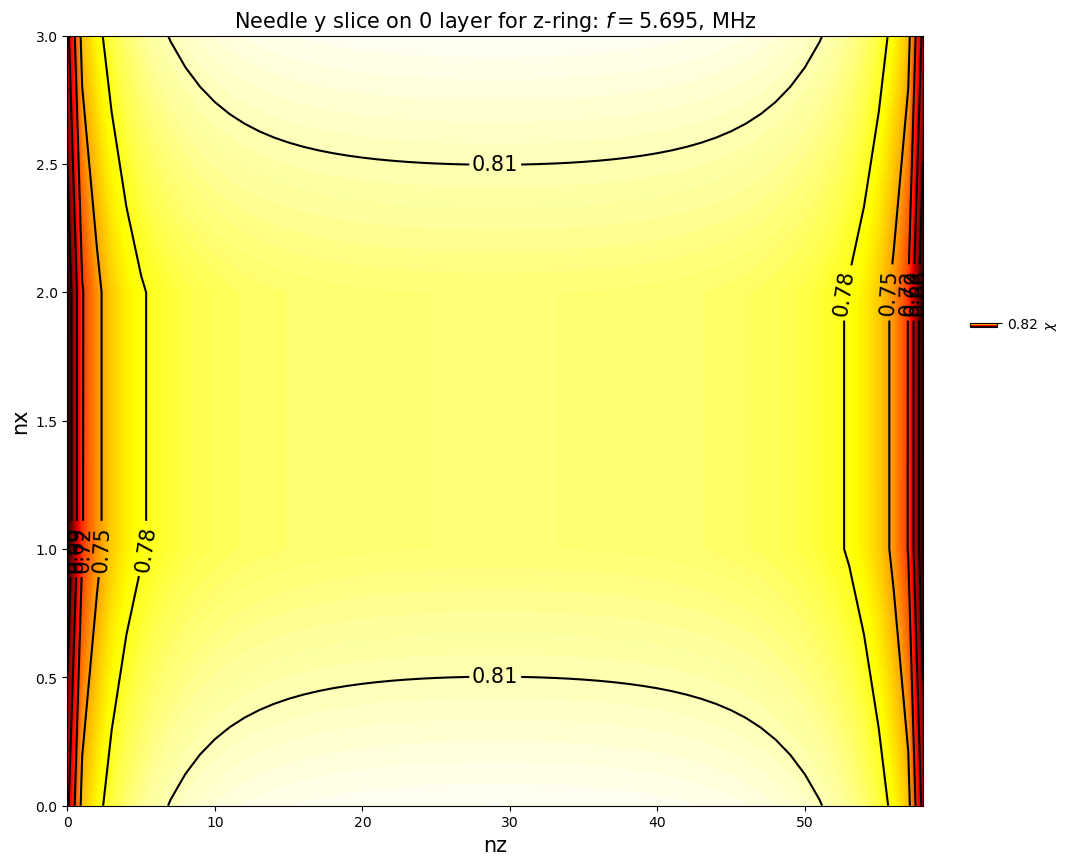

In [32]:
# Calculate and compare polarisation for different structures

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as anime
from tqdm import tqdm

# Drawing GIFs

''' 
- Datas_sets is a dictionary with keys as names of datasets and values as datasets
- rtypes is a list of ring types
- slice_ors is a list of slice orientations
- slice_deeps is a dictionary with keys as tuples (name, rtype, slice_or) and values as lists of slice deeps,
number of slice deeps should be the same for each id
- name is a name of the GIF 
'''
def SaveDistribution(Data_sets, rtypes, slice_ors, slice_deeps, Name):
    
    # Get Data for plotting
    Currents2D = {}
    Omega = {}
    MaxCurrents = {}
    MinCurrents = {}
    MaxDeltaCurrents = {}
    n_1, n_2 = {}, {}
    X, Y = {}, {}

    grid_num = 0
    for name in Data_sets:
        Data = Data_sets[name]
        Omega[name] = np.array(Data["Omega"])
        Currents_4D = np.array(Data["RealCurrents"], dtype = complex) + 1j * np.array(Data["ImagCurrents"], dtype= complex)

        Params = Data['Params']

        Dz, Dy, Dx = Params['Dz'], Params['Dy'], Params['Dx']
        Radius = Params['Radius']
        N = Params['N']
        H_0z = 1

        for rtype in rtypes:
            start = 0
            # Calculate start and end positions for each ring type
            for ring_type in N:
                if ring_type != rtype:
                    start += np.prod([N[ring_type][j] for j in N[ring_type]])
                else:
                    break
            end = start + np.prod([N[rtype][j] for j in N[rtype]])
            
            for slice_or in slice_ors:
                slice_id = (name, rtype, slice_or)
                for slice_deep in slice_deeps[slice_id]:
                    # Calculate position in plotting grid
                    data_pos = 1 + list(Data_sets.keys()).index(name)
                    slice_deep_pos = list(slice_deeps[slice_id]).index(slice_deep) * len(Data_sets)
                    slice_pos = list(slice_ors).index(slice_or) * len(Data_sets) * len(slice_deeps[slice_id])
                    rtype_pos = list(rtypes).index(rtype) * len(Data_sets) * len(slice_ors) * len(slice_deeps[slice_id])

                    grid_num = data_pos + slice_pos + slice_deep_pos + rtype_pos
                    Id = (name, rtype, slice_or, slice_deep, grid_num)
                    
                    # Get current slice for choosen parameters
                    rslice = [slice(slice_deep * (slice_or =='z'), (slice_deep+1)*(slice_or=='z') + N[rtype]['nz'] * (slice_or != 'z'), 1),
                      slice(slice_deep * (slice_or =='y'), (slice_deep+1)*(slice_or=='y') + N[rtype]['ny'] * (slice_or != 'y'), 1),
                      slice(slice_deep * (slice_or =='x'), (slice_deep+1)*(slice_or=='x') + N[rtype]['nx'] * (slice_or != 'x'), 1)]

                    Currents2D[Id] = np.real(np.squeeze(Currents_4D[:,start:end].reshape([len(Omega[name])]+ [N[rtype][j] for j in N[rtype]])[:, *rslice]))*np.pi * Radius ** 2 /Dz/Dy/Dx/H_0z

                    # Calculate extremums for each slice
                    MaxCurrents[Id] = Currents2D[Id].max()
                    MinCurrents[Id] = Currents2D[Id].min()
                    MaxDeltaCurrents[Id] = MaxCurrents[Id] - MinCurrents[Id]

                    n_1[Id], n_2[Id] = tuple([j for j in N[rtype].keys() if j != f'n{slice_or}'])

                    X[Id], Y[Id] = list(range(N[rtype][n_1[Id]])), list(range(N[rtype][n_2[Id]]))
        

    fig, ax = plt.subplots()

    # Numbers of plots in x and y axes

    xn = len(Data_sets) * len(slice_deeps[slice_id])
    yn = len(rtypes) * len(slice_ors) 

    # Figsize
    xsize = xn*12
    ysize = yn*10

    def plot_GIF(i):
        # Clearing figure and set figsize
        plt.clf()
        fig.set_size_inches(xsize, ysize)
        for Id in Currents2D:
            name, rtype, slice_or, slice_deep, grid_num = Id
            
            plt.subplot(yn, xn, grid_num)
            Currents = Currents2D[Id][i]    
            omega = Omega[name][i]

            # Set axes scale and avoid extra long plots

            # Draw same-value lines
            Lines = plt.contour(X[Id], Y[Id], Currents.T, 6, colors = 'black')

            # Calculate max currents to normilze it for spectral max
            Imax, Imin = Currents.max(), Currents.min()
            DeltaCurrents = Imax - Imin
            
            # Calculate length of colorbar
            amplitude = DeltaCurrents/MaxDeltaCurrents[Id]

            if abs((Imin - MinCurrents[Id])/Imin) < 1e-3 and abs((Imax - MaxCurrents[Id])/MaxCurrents[Id]) < 1e-3:
                middlepos = 0
            else:
                middlepos = (Imin-MinCurrents[Id])/(MaxDeltaCurrents[Id] - DeltaCurrents)

            # Calculate number of ticks depended on coloubar length
            ticksnumber = round(amplitude * 10) + 1
            ticks = list(map(lambda x: round(np.real(x), 2), np.linspace(Imax, Imin, ticksnumber)))

            plt.xlabel(n_1[Id], fontsize = 15)
            plt.ylabel(n_2[Id], fontsize = 15)

            # Draw colormap
            plt.contourf(X[Id], Y[Id], Currents.T, 100, cmap=plt.cm.hot)
            plt.clabel(Lines, inline=1, fontsize=15)
            plt.colorbar(label = r'$\chi$', fraction = 0.03, pad = 0.05, 
                              shrink = 10, aspect = amplitude/0.03, anchor = (0, middlepos),
                              ticks = ticks)
            scale = len(Y[Id])/len(X[Id])

            if scale < 1/3:
                ax.set_aspect(1/3)
            elif scale > 3:
                ax.set_aspect(3)
            else:
                ax.set_aspect(scale)
            
            plt.title(f"{name} {slice_or} slice on {slice_deep} layer for {rtype}-ring: $f =${round(omega/2/np.pi/10 ** 6, 3)}, MHz", fontsize = 15)

    # Make and save animation object
    ani = anime.FuncAnimation(fig, plot_GIF,
                              frames = list(range(len(Omega[name]))),
                              interval = 50
                              )

    ani.save(f'{Name}.gif', writer='pillow', fps=24, dpi=80)

Data_sets = {'Needle': Data['58x4x4']}#, 'Straight': Data_straight}
rtypes = ('z')
slice_ors = ('y')
slice_deeps = {}
for name in Data_sets:
    for rtype in rtypes:
        for slice_or in slice_ors:
            slice_deeps[(name, rtype, slice_or)] = [0]
SaveDistribution(Data_sets, rtypes, slice_ors, slice_deeps, f'Plots/Current_distribution/Form/SmallNeedleZY0-58x4x4')        

In [24]:
rtype, slice_or = 'x', 'z'
N = {
        'z': {'nz': 11, 'ny':10, 'nx': 10},
        'y': {'nz': 10, 'ny': 11, 'nx': 10},
        'x': {'nz': 10, 'ny': 10, 'nx': 11}
        }
n_1, n_2 = tuple([j for j in N[rtype].keys() if j != f'n{slice_or}'])
print(n_1, n_2)
X, Y = list(range(N[rtype][n_1])), list(range(N[rtype][n_2]))
print(X, Y)
print(X[-1:0:-1])

ny nx
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[9, 8, 7, 6, 5, 4, 3, 2, 1]


MovieWriter imagemagick unavailable; using Pillow instead.


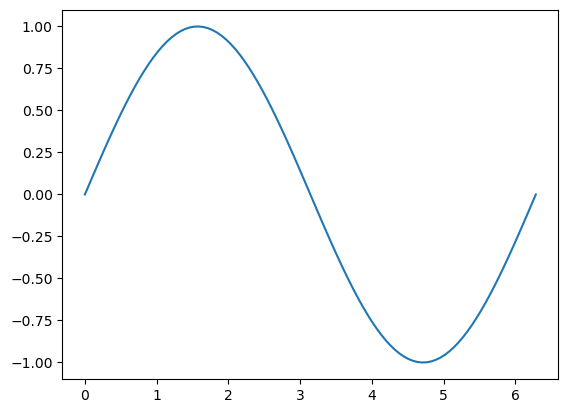

In [4]:

fig, ax = plt.subplots()
def plot_GIF(i):
    ax.clear()
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin(x + i/10)
    plt.plot(x, y)
ani = anime.FuncAnimation(fig, plot_GIF,
                          frames = len(Omega)//10,
                          interval = 50
                          )
ani.save('Plots/Form/CubeSlicingZ.gif', writer='imagemagick', fps=24)

In [65]:
a = {('a', 'b'): slice(1, 2, 3)}
n_1, n_2 = list(a.keys())[0]
rslice = list(a.values())[0]
print(n_1, n_2 , rslice)
a = np.zeros((5, 5, 5))
rslice = [slice(1, 2, 1), slice(1, 2, 1), slice(1, 2, 1)]
print(a[*rslice].shape)

a b slice(1, 2, 3)
(1, 1, 1)
